# *Bankers in the Ivory Tower*

### By Charlie Eaton

### Figure 4.4: Annual rate of return and private equity and hedge fund board members, 2003– 2013

In [1]:
*ssc install blindschemes

In [2]:
use data/d4_2_4_6_board_cae_nacubo, clear
drop if year>2013



(240 observations deleted)


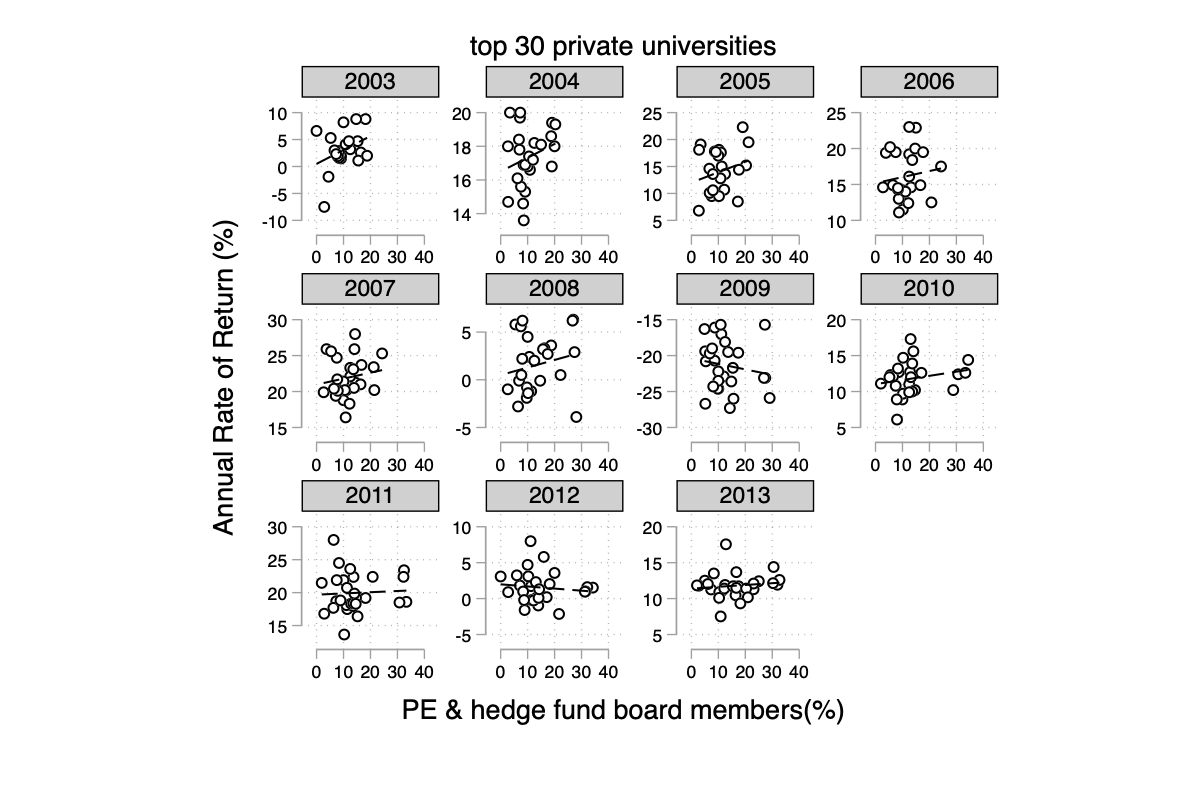




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_4_private_returns_board.pdf saved as PDF format


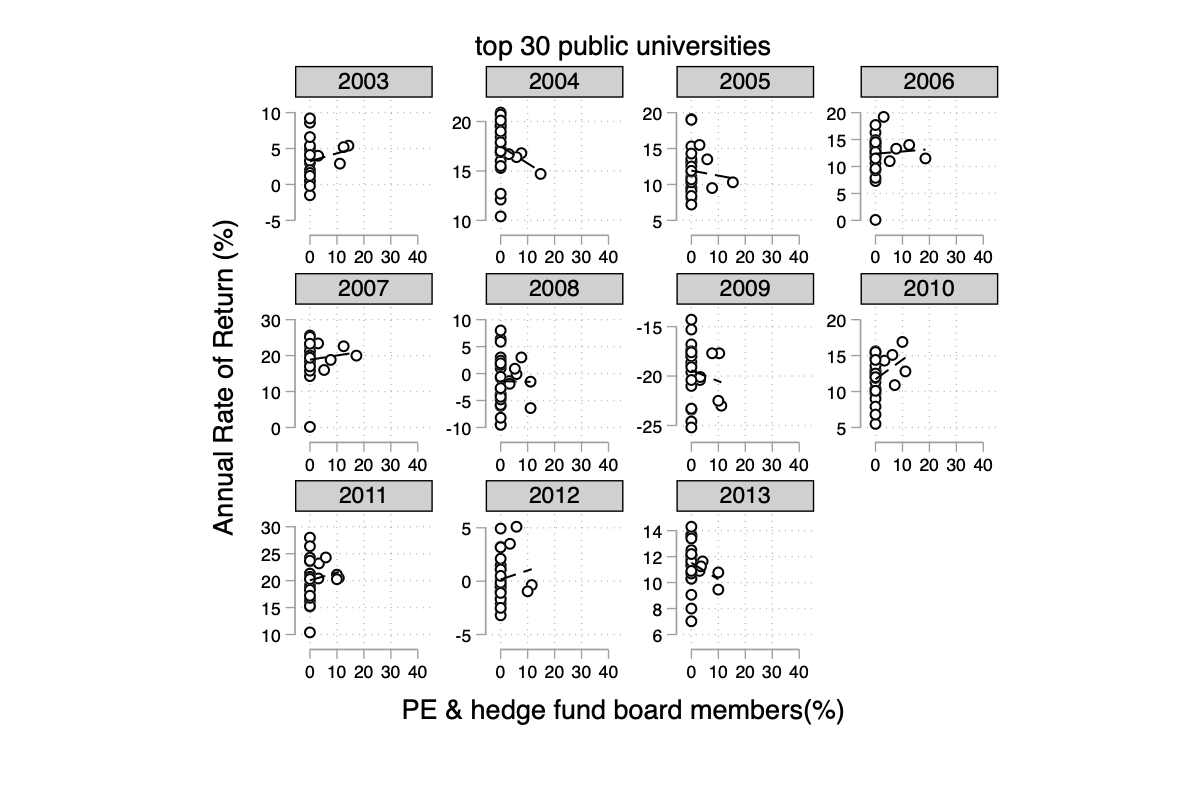




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 4 - The Top -
    Endowments/figures/f4_4_public_returns_board.pdf saved as PDF format


In [3]:
tw (scatter rrr pctalt if control==2, msym(O) mc(black) mfc(white)) ///
	(lfit rrr pctalt if control==2, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero) iscale(.85) row(3) legend(off) title(top 30 private universities) note(" ")) ///
		ytitle("Annual Rate of Return (%)") ///
		xtitle(PE & hedge fund board members(%))  xlabel(0(10)40) ///
		xsize(6) aspect(1) name(private_board_hedge, replace) scheme(plotplain)
graph export figures/f4_4_private_returns_board.pdf, replace

tw (scatter rrr pctalt  if control==1, msym(O) mc(black) mfc(white)) ///
	(lfit rrr pctalt if control==1, lp(dash) lc(black)), ///
		by(year, rescale iylabel ixlabel imargin(zero)  iscale(.85) row(3) legend(off) title(top 30 public universities) note(" ")) ///
		ytitle("Annual Rate of Return (%)") ///
		xtitle(PE & hedge fund board members(%))  xlabel(0(10)40) ///
		xsize(6) aspect(1) name(public_board_hedge, replace) scheme(plotplain)
graph export figures/f4_4_public_returns_board.pdf, replace

In [4]:
sort unitid year
gen f1alt_invest_p = f1.alt_invest_p if unitid==f1.unitid



(132 missing values generated)


In [5]:
est clear
qui eststo: regress f1.rrr pctalt i.year, cluster(unitid)
qui eststo: regress f1.rrr pctalt f1alt_invest_p i.year, cluster(unitid)
qui eststo: regress f1.rrr pctalt f1alt_invest_p endow_assets_c_log  i.year, cluster(unitid)
qui eststo: regress f1.rrr pctalt endow_assets_c_log f1alt_invest_p acceptrate i.year, cluster(unitid)
qui eststo: regress f1.rrr pctalt endow_assets_c_log f1alt_invest_p acceptrate i.control i.year, cluster(unitid)

In [6]:
%html esttab, keep(pctalt endow_assets_c_log f1alt_invest_p acceptrate 2.control) html se star(+ 0.10 * 0.05)

This front-end or document format cannot display HTML